In [1]:
# get dailymile-sque statistics
!wget --no-check-certificate -O dailymilesque_stats.csv 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc/pub?gid=170553600&single=true&output=csv'

# get current year runs
!wget --no-check-certificate -O running_data.csv 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc/pub?gid=291786965&single=true&output=csv'

%ls

--2022-01-06 08:03:26--  https://docs.google.com/spreadsheets/d/e/2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc/pub?gid=170553600&single=true&output=csv
Resolving docs.google.com (docs.google.com)... 142.250.217.238, 2607:f8b0:4008:807::200e
Connecting to docs.google.com (docs.google.com)|142.250.217.238|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0c-bk-sheets.googleusercontent.com/pub/70cmver1f290kjsnpar5ku2h9g/9frk7cpe1ielio6ds33lfbb0m8/1641477805000/114871121160870939545/*/e@2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc?gid=170553600&single=true&output=csv [following]
--2022-01-06 08:03:27--  https://doc-0c-bk-sheets.googleusercontent.com/pub/70cmver1f290kjsnpar5ku2h9g/9frk7cpe1ielio6ds33lfbb0m8/1641477805000/114871121160870939545/*/e@2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc?gid=170553600&single=tr

In [2]:
# https://calplot.readthedocs.io/en/latest/
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

import pandas as pd
import calplot
import datetime
import matplotlib.pyplot as plt

In [3]:
csv2read = "./running_data.csv"
dm_df = pd.read_csv(csv2read)
#xlsx2read = "~/Drive/IFTTT/runningData.xlsx"
#dm_df = pd.read_excel(xlsx2read)
dm_df.tail()

,fuente,date,distance (m),time (s),distance (km),~energy (kcal),time (h:mm:ss),pace (min/km),climb (m),cadence (spm),country
0,https://www.strava.com/activities/6469202165,2022-01-03 19:19:49,4015.6,1580,4.02,374.41,26:20:00,6:33,39.5,155,Costa Rica
1,https://www.strava.com/activities/6479176876,2022-01-05 18:25:58,3950.6,1570,3.95,368.35,26:10:00,6:37,40.8,154,Costa Rica


In [4]:
distances = dm_df['distance (km)']
#distances.dtype
dm_df.date = pd.to_datetime(dm_df['date'], format='%Y-%m-%d')
#dm_df.date.dtype
runs = dm_df.date
distances.index = runs
#print(isinstance(distances, pd.Series)) #Confirm that the object is a Series
runs

0   2022-01-03 19:19:49
1   2022-01-05 18:25:58
Name: date, dtype: datetime64[ns]

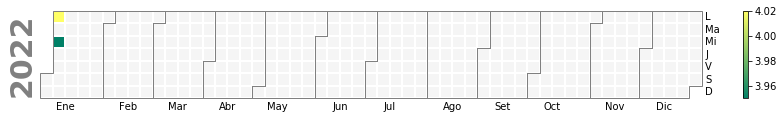

In [19]:
# https://stackoverflow.com/questions/21321670/how-to-change-fonts-in-matplotlib-python

output_image = "../assets/img/running_current"
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Dic']
dias = ['L','Ma','Mi','J','V','S','D']
plot = calplot.calplot( distances, yearascending=0, cmap='summer', dropzero=True,
                monthlabels=meses, dayticks=True, daylabels=dias
                )

# plt.savefig(output_image+".pdf", transparent=True)
plt.savefig(output_image+".png", transparent=True)
# plt.savefig(output_image+".svg", transparent=True)
!convert -trim "../assets/img/running_current.png" "../assets/img/running_current.png"